In [36]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import scipy.io
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import sklearn.datasets
import re
import seaborn as sns
import datetime as dt
import time
from tensorflow.python.framework import ops


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Preprocessing

In [37]:
rawdata = pd.read_excel('SBA_Loan_data_.xlsx')

In [38]:
rawdata.head()

,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,...,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount
0,504,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,...,NaN,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0
1,504,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,...,NaN,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0
2,504,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,...,NaN,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0
3,504,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,...,NaN,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0
4,504,"RON SAUNORIS GARDEN CTR, INC.",13747 W. 159TH ST.,LOCKPORT,IL,60441,MISSNG/INACTV LENDER,NaN,NaN,NaN,...,NaN,240,NaN,NaN,WILL,IL,CORPORATION,CANCLD,NaT,0.0


In [39]:
rawdata.columns

Index(['Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip',
       'CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'CDC_Zip',
       'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ThirdPartyDollars', 'GrossApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc',
       'InitialInterestRate', 'TermInMonths', 'NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType', 'LoanStatus',
       'ChargeOffDate', 'GrossChargeOffAmount'],
      dtype='object')

In [40]:
# drop the first column
print(np.unique(rawdata['Program']))
#checkCol(rawdata, 'Program', numRow, isCata = False)
rawdata = rawdata.drop(['Program'],axis = 1)

[504]


In [41]:
# remove cancelled and exempt
rawdata = rawdata[(rawdata['LoanStatus'] == 'PIF') | (rawdata['LoanStatus'] == 'CHGOFF')]
rawdata['target'] = [int(i) for i in rawdata['LoanStatus'] == 'CHGOFF']
rawdata.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,CDC_State,CDC_Zip,...,TermInMonths,NaicsCode,NaicsDescription,ProjectCounty,ProjectState,BusinessType,LoanStatus,ChargeOffDate,GrossChargeOffAmount,target
0,ROBERT G. FIELDS AND MARY D. F,55 & RICHLAND,KANSAS CITY,KS,66106,Avenue Area Incorporated,3324 Emerald Lane,Jefferson City,MO,65109.0,...,12,NaN,NaN,WYANDOTTE,KS,INDIVIDUAL,PIF,NaT,0.0,0
1,CANDLELAMP COMPANY,3454 NIKI WAY,RIVERSIDE,CA,92507,CDC Small Business Finance Cor,2448 Historic Decatur,San Diego,CA,92106.0,...,240,NaN,NaN,RIVERSIDE,CA,INDIVIDUAL,PIF,NaT,0.0,0
2,"NATIONAL COMPOSITES, INC.",2303 N. BENDIX DRIVE,SOUTH BEND,IN,46628,Business Development Corporati,218 W. Washington Street,South Bend,IN,46601.0,...,120,NaN,NaN,ST JOSEPH,IN,CORPORATION,PIF,NaT,0.0,0
3,WENDY'S OF HARRISBURG,OUTLOT A. TR. 45N & SMALL ST,HARRISBURG,IL,62946,Small Business Growth Corporat,2401 West White Oaks Drive,Springfield,IL,62704.0,...,240,NaN,NaN,SALINE,IL,CORPORATION,CHGOFF,2003-03-28,0.0,1
6,"ROCKY MTN EMPLOYE BENEFTS, INC",3200 S. 700 E.,SALT LAKE CITY,UT,84106,Mountain West Small Business F,2595 East 3300 South,Salt Lake City,UT,84109.0,...,240,NaN,NaN,SALT LAKE,UT,CORPORATION,PIF,NaT,0.0,0


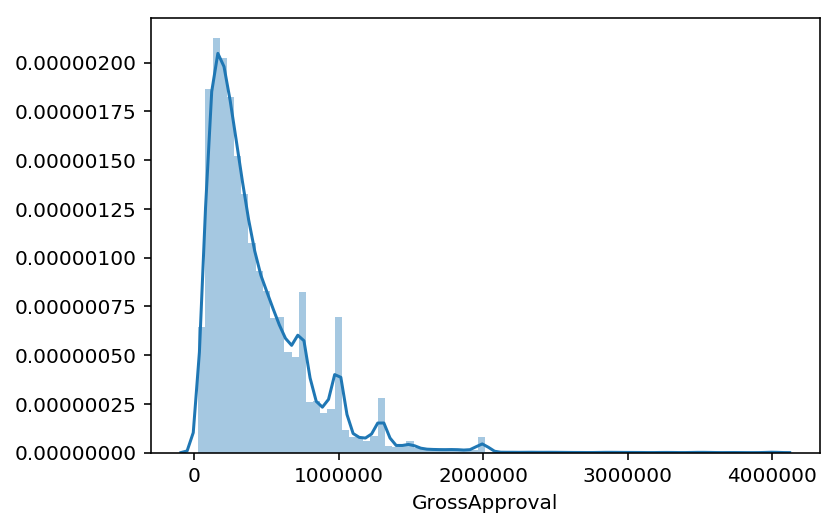

In [105]:
vis1 = sns.distplot(rawdata["GrossApproval"], bins = 80)

C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


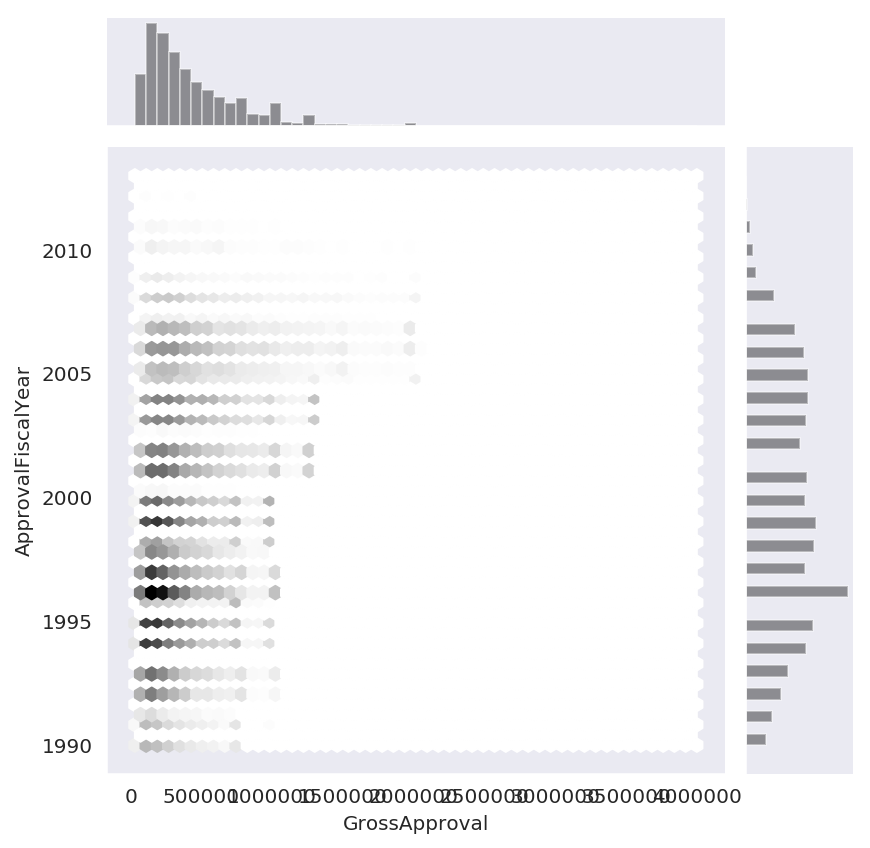

In [8]:
with sns.axes_style("dark"):
    sns.jointplot(data = rawdata, x = "GrossApproval", y = "ApprovalFiscalYear", kind="hex", color="k")

In [ ]:
sns.pairplot(rawdata)

C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\THINKPAD\AppData\Local\Continuum\Anaconda3\envs\Tensor\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [ ]:
sns.catplot(x = "BorrState", y = "GrossApproval", data = rawdata)

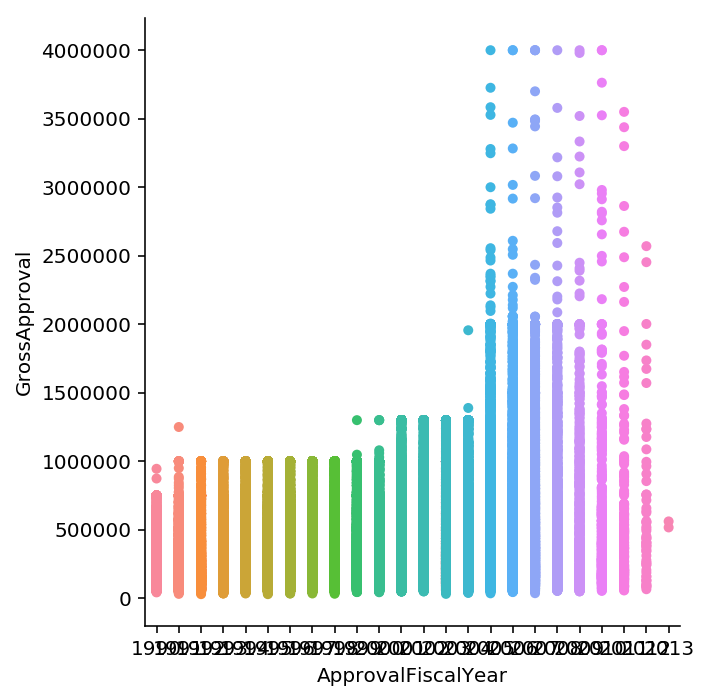

In [45]:
sns.catplot(x = "ApprovalFiscalYear", y = "GrossApproval", data = rawdata, jitter = False)

In [42]:
# add feature GSP in the borrower state and year
state = pd.read_csv('state.csv',header = None)
state.set_index(0,inplace = True)
statedict = state.to_dict()[1]
statedict['District of Columbia'] = 'DC'
statedict['Puerto Rico'] = 'PR'
statedict['Guam'] = 'GU'
gsp = pd.read_excel('GSP.xls')
gsp['state'] = gsp['GeoName'].map(lambda x: statedict[x] if x in statedict else '')
gsp.set_index('state',inplace = True)
gsp_pr = pd.read_excel('GSP-PR.xls')
gsp_pr['ind'] = gsp_pr['year'].map(lambda x: str(x)[:4])
gsp_pr.set_index('ind',inplace = True)

In [43]:
Borrgsp = []
BorrState = list(rawdata['BorrState'])
ProjectState = list(rawdata['ProjectState'])
year = list(rawdata['ApprovalFiscalYear'])
for i in range(len(year)):
    if BorrState[i] == 'PR':
        Borrgsp.append(gsp_pr.loc[str(year[i]),'GSP'])
    else:
        Borrgsp.append(gsp.loc[BorrState[i],str(year[i])] if BorrState[i] in gsp.index else 0)
rawdata['Borrgsp'] = Borrgsp

In [44]:
# add feature unemployment rate in the borrower state and year & project state and year
import re
unemploydict = {}
with open('unemply_dict.txt') as file:
    lines = file.readlines()

for i in range(len(lines)):
    if i%2 == 0:
        line = lines[i]
        state = re.search('(wide )(.+)(Season)',line).group(2)
        state = state[:(len(state)//2)][:-1]
        unemploydict[re.search('LASST(\w+)',line).group(0)] = state
#print(unemploydict)       

In [45]:
unemply_all = pd.read_excel('unemploy_all.xlsx')
flag = unemply_all['Series ID'].map(lambda x: x in unemploydict)
unemply_all['flag'] = flag
unemply_all = unemply_all[unemply_all['flag'] == True]
unemply_all['state'] = unemply_all['Series ID'].map(lambda x: statedict[unemploydict[x]])
unemply_all.set_index('state',inplace = True)
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for y in range(1990,2014):
    cols = [m+'\n'+str(y) for m in month]
    unemply_all[y] = list(unemply_all.loc[:,cols].mean(axis=1))

In [46]:
#unemply_all.head()

In [47]:
unemploy_bow = []
for i in range(len(year)):
    unemploy_bow.append(unemply_all.loc[BorrState[i],year[i]] if BorrState[i] in unemply_all.index else 0)
rawdata['unemploy_bow'] = unemploy_bow

In [48]:
ProjectState = list(rawdata['ProjectState'])
unemploy_pro = []
for i in range(len(year)):
    unemploy_pro.append(unemply_all.loc[ProjectState[i],year[i]] if ProjectState[i] in unemply_all.index else 0)
rawdata['unemploy_pro'] = unemploy_pro

In [49]:
# add feature S&P 500 of approval date

SPall = pd.read_csv('SP500all.csv')
SPall['Date'] = pd.to_datetime(SPall['Date'])
SPall['Date'] = SPall['Date'].dt.strftime('%Y/%m/%d').astype('str')
rawdata['strdate'] = rawdata['ApprovalDate'].dt.strftime('%Y/%m/%d').astype('str')
date = list(rawdata['strdate'])
SPall.set_index('Date',inplace=True)
SP500 = []
for i in range(len(date)):
    if date[i] in SPall.index:
        SP500.append(SPall.loc[date[i],'Adj Close'])
    else:
        prev = date[i][:-2]+str(int(date[i][-2:])-1).zfill(2)
        if prev in SPall.index:
            SP500.append(SPall.loc[prev,'Adj Close'])
        else:
            post = date[i][:-2]+str(int(date[i][-2:])+1).zfill(2)
            if post in SPall.index:
                SP500.append(SPall.loc[post,'Adj Close'])   
            else:
                prev2 = date[i][:-2]+str(int(date[i][-2:])-2).zfill(2)
                SP500.append(SPall.loc[prev2,'Adj Close'])
rawdata['SP500'] = SP500

In [50]:
# add feature borrower state != bank state

rawdata['borrCDC'] = rawdata['BorrState'] == rawdata['CDC_State']

In [51]:
# add feature borrower state != third party lender state

rawdata['borrthird'] = rawdata['BorrState'] == rawdata['ThirdPartyLender_State']

In [52]:
# add feature borrower state != project state

rawdata['borrpro'] = rawdata['BorrState'] == rawdata['ProjectState']

In [53]:
#rawdata['ThirdPartyDollars'] = rawdata['ThirdPartyDollars'].fillna(0)
total = rawdata['ThirdPartyDollars'].fillna(0) + rawdata['GrossApproval']

In [54]:
# log transformation
logcols = ['GrossApproval','ThirdPartyDollars','SP500','Borrgsp']
for col in logcols:
    rawdata[col] = np.log(rawdata[col]+1)
#borrgsp = list(rawdata['Borrgsp'])
#logborrgsp = []
#for i in range(len(borrgsp)):
#    if i == 0:
#        logborrgsp.append(0)
#    else:
#        logborrgsp.append(np.log(i))

In [55]:
# add feature total loan amount
rawdata['total'] = total

In [56]:
# drop loss severity > 1
charge = rawdata['GrossChargeOffAmount'].fillna(0)
severity = charge/total
rawdata['severity'] = severity
rawdata = rawdata[rawdata['severity'] <= 1]


In [57]:
# add feature term is integer times of year

rawdata['termint'] = rawdata['TermInMonths']%12 == 0

In [58]:
# add feature loan age
today = max(rawdata['ApprovalDate'])
chargeOffDate = list(rawdata['ChargeOffDate'])
approvalDate = list(rawdata['ApprovalDate'])
age = []
for i in range(len(chargeOffDate)):
    if type(chargeOffDate[i]) == pd._libs.tslibs.nattype.NaTType:
        age.append(today - approvalDate[i])
    else:
        age.append(chargeOffDate[i] - approvalDate[i])
rawdata['age'] = age
rawdata['age'] = rawdata['age'].fillna(0).astype('str')
age = rawdata['age'].map(lambda x: x.split('days')[0][:-1])
rawdata['age'] = age.astype('int64')

In [59]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54715 entries, 0 to 140496
Data columns (total 42 columns):
BorrName                  54715 non-null object
BorrStreet                54707 non-null object
BorrCity                  54715 non-null object
BorrState                 54715 non-null object
BorrZip                   54715 non-null int64
CDC_Name                  54715 non-null object
CDC_Street                54523 non-null object
CDC_City                  54523 non-null object
CDC_State                 54523 non-null object
CDC_Zip                   54523 non-null float64
ThirdPartyLender_Name     16949 non-null object
ThirdPartyLender_City     16949 non-null object
ThirdPartyLender_State    17064 non-null object
ThirdPartyDollars         16880 non-null float64
GrossApproval             54715 non-null float64
ApprovalDate              54715 non-null datetime64[ns]
ApprovalFiscalYear        54715 non-null int64
DeliveryMethod            54715 non-null object
subpgmdesc       

In [60]:
numRow = len(rawdata)
def checkCol(df, colName, numRow, isCata = True):
    print(colName, ':')
    print('Any NA?: ', df[colName].isnull().values.any())
    if df[colName].isnull().values.any():
        numNA = sum(df[colName].isnull().values)
        print ('    # of NA: ', numNA)
        print ('    NA%:     ', numNA/numRow)
    if isCata:
        levelList = df[colName].unique()
        print('Different levels: ', len(levelList), levelList)
        fillna(df, colName, isCata = True)
        
    else:
        print('range: ', min(df[colName].astype(float).dropna()), max(df[colName].astype(float).dropna()))
        fillna(df, colName, isCata = False)
        
def fillna(df, colName, isCata = True):
    if isCata:
        df[colName] = df[colName].fillna('0')
    else:
        if df[colName].isnull().values.any():
            df[colName+'_dm'] = df[colName].isnull().astype(int)
        df[colName] = df[colName].fillna(0)
    return df


In [61]:
state = pd.read_csv('state.csv',header = None)
state.set_index(0,inplace=True)
borrstate_rate = rawdata.groupby('BorrState').mean()['target']
state[1].map(lambda x: borrstate_rate[x]).to_csv('borrstate_rate.csv')
cdcstate_rate = rawdata.groupby('CDC_State').mean()['target']
state[1].map(lambda x: cdcstate_rate[x]).to_csv('cdcstate_rate.csv')

In [62]:
catCols = ['BorrName', 'BorrCity', 'BorrState','CDC_Name', 'CDC_Street', 'CDC_City', 'CDC_State', 'ThirdPartyLender_Name', 'ThirdPartyLender_City',
       'ThirdPartyLender_State', 'ApprovalFiscalYear', 'DeliveryMethod', 'subpgmdesc','NaicsCode', 'NaicsDescription',
       'ProjectCounty', 'ProjectState', 'BusinessType'
       ]
numCols = ['BorrZip','CDC_Zip','ThirdPartyDollars', 'GrossApproval','InitialInterestRate', 'TermInMonths','Borrgsp','unemploy_bow','unemploy_pro','SP500','borrthird','borrpro','borrCDC','total','termint']
for col in catCols:
    checkCol(rawdata, col, numRow, isCata = True)
for col in numCols:
    checkCol(rawdata, col, numRow, isCata = False)

BorrName :
Any NA?:  False
Different levels:  51984 ['ROBERT G. FIELDS AND MARY D. F' 'CANDLELAMP COMPANY'
 'NATIONAL COMPOSITES, INC.' ... 'Master Precision Global, LLC'
 'Precision Electric Group, Inc.' 'Material Innovations, Incorpor']
BorrCity :
Any NA?:  False
Different levels:  7433 ['KANSAS CITY' 'RIVERSIDE' 'SOUTH BEND' ... 'Sonoma' 'Vicksburg' 'Redmond']
BorrState :
Any NA?:  False
Different levels:  54 ['KS' 'CA' 'IN' 'IL' 'UT' 'OH' 'VA' 'WI' 'PR' 'NY' 'AZ' 'NH' 'NV' 'MD'
 'MO' 'TN' 'KY' 'AL' 'LA' 'GA' 'FL' 'IA' 'AK' 'SD' 'CO' 'ME' 'ID' 'OR'
 'NC' 'MN' 'RI' 'MS' 'MA' 'TX' 'WA' 'VT' 'MI' 'CT' 'ND' 'MT' 'HI' 'NE'
 'OK' 'SC' 'PA' 'AR' 'NJ' 'WV' 'DE' 'WY' 'GU' 'NM' 'DC' 'VI']
CDC_Name :
Any NA?:  False
Different levels:  296 ['Avenue Area Incorporated' 'CDC Small Business Finance Cor'
 'Business Development Corporati' 'Small Business Growth Corporat'
 'Mountain West Small Business F' 'Community Capital Development'
 'County Corp Development' 'Crater Development Company'
 'Wiscons

Different levels:  334 ['3324 Emerald Lane' '2448 Historic Decatur' '218 W. Washington Street'
 '2401 West White Oaks Drive' '2595 East 3300 South' '900 Michigan Avenue'
 '130 W. Second St.' '1964 Wakefield Street' '100 River Place'
 '239 Arterial Hostos Avenue' '16 James Street' '410 Hemsted Drive'
 '335 N. Wilmot Road' 'One Cate Street' '626 South 9th Street'
 '426 D Street' nan '200 W. Douglas' '441 East Whittier Boulevard'
 '300 East State Street,' '5333 South Adams Ave.' '1100 14th Street'
 '5217 Hwy. B' '111 St. James Court' '151 N. Delaware'
 '8132 Old Federal Rd.' '5210 Hollywood Avenue' '50 Beaver Street'
 '6445 Powers Ferry Road' '1100 Walnut' '6801 Lake Worth Road'
 '1500 1st Avenue North' '5409 NW 88th Street' '809 North Broadway'
 '619 Warehouse Ave' '711 E. Wells Avenue' '1175 Osage Street'
 '40 Harlow Street' '400 Robert D Ray Drive' '175-C Emory Highway'
 '7370 Liberty One Drive' '1631 17th Street' '1161 W River Street'
 '117 Southcrest Drive' '1300 Baxter Street' '1776

ThirdPartyLender_Name :
Any NA?:  True
    # of NA:  37766
    NA%:      0.6902311980261354
Different levels:  2386 [nan 'Ocean Bank' 'Zions First National Bank' ... 'Currie State Bank'
 'Postal CU' 'KALSEE CU']
ThirdPartyLender_City :
Any NA?:  True
    # of NA:  37766
    NA%:      0.6902311980261354
Different levels:  1582 [nan 'MIAMI' 'SALT LAKE CITY' ... 'LOS ALTOS' 'MODESTO' 'CURRIE']
ThirdPartyLender_State :
Any NA?:  True
    # of NA:  37651
    NA%:      0.6881293977885407
Different levels:  62 [nan 'FL' 'UT' 'NJ' 'CA' 'NC' 'TX' 'DE' 'NH' 'RI' 'NY' 'VA' 'CT' 'IL' 'OH'
 'MA' 'SD' 'MN' 'MO' 'WA' 'AZ' 'CO' 'GA' 'SC' 'ND' 'OR' 'NV' 'IA' 'KS'
 'AL' 'TN' 'MI' 'PA' 'NE' 'HI' 'IN' 'WV' 'PR' 'NM' 'OK' 'MT' 'MS' 'KY'
 'ID' '#N' 'MD' 'WI' 'DC' 'VT' 'ME' 'AK' 'LA' 'AR' 'Ba' '0' 'WY' 'St' 'AB'
 'BC' 'D.' 'Ro' 'GU']
ApprovalFiscalYear :
Any NA?:  False
Different levels:  24 [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2

In [63]:
# transform data type
rawdata['CDC_Zip'] = rawdata['CDC_Zip'].astype('int64')
for col in catCols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(rawdata[col].values.astype('str')))
    rawdata[col] = lbl.transform(list(rawdata[col].values.astype('str')))
    rawdata[col] = rawdata[col].astype('category')
rawdata['InitialInterestRate'] = rawdata['InitialInterestRate'].astype('float64')
rawdata['ThirdPartyDollars'] = rawdata['ThirdPartyDollars'].astype('float64')
rawdata['total'] = rawdata['total'].astype('float64')
rawdata['borrpro'] = rawdata['borrpro'].astype('int64')
rawdata['borrthird'] = rawdata['borrthird'].astype('int64')
rawdata['borrCDC'] = rawdata['borrCDC'].astype('int64')
rawdata['termint'] = rawdata['termint'].astype('int64')
rawdata.dtypes

BorrName                        category
BorrStreet                        object
BorrCity                        category
BorrState                       category
BorrZip                            int64
CDC_Name                        category
CDC_Street                      category
CDC_City                        category
CDC_State                       category
CDC_Zip                            int64
ThirdPartyLender_Name           category
ThirdPartyLender_City           category
ThirdPartyLender_State          category
ThirdPartyDollars                float64
GrossApproval                    float64
ApprovalDate              datetime64[ns]
ApprovalFiscalYear              category
DeliveryMethod                  category
subpgmdesc                      category
InitialInterestRate              float64
TermInMonths                       int64
NaicsCode                       category
NaicsDescription                category
ProjectCounty                   category
ProjectState    

In [64]:
# store processed data
rawdata.to_csv('raw_data.csv')